<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/AULA_B_38_oct_16_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

********************************
Valores costos MSE, por iteración:
Íteración 0: 0.37244252954643503
Íteración 1: 0.006168925295418477
Íteración 2: -0.3939986631364804
Íteración 3: -0.6095269411380074
Íteración 4: -0.5767730099816253
Íteración 5: -0.45848757909410354
Íteración 6: -0.3628056433638777
Íteración 7: -0.2954294359970721
Íteración 8: -0.24742394099237153
Íteración 9: -0.21204377190237944
Íteración 10: -0.18509148642080456
Íteración 11: -0.1639660706510358
Íteración 12: -0.14700733944605632
Íteración 13: -0.13311812784012103
Íteración 14: -0.12154905586025615
Íteración 15: -0.11177294583688935
Íteración 16: -0.10340916388210568
Íteración 17: -0.09617653784606968
Íteración 18: -0.08986315538814468
Íteración 19: -0.08430644666229756
Íteración 20: -0.07937971727544896
Íteración 21: -0.07498283559113118
Íteración 22: -0.07103566112657372
Íteración 23: -0.06747332169251326
Íteración 24: -0.06424276253576594
Íteración 25: -0.06130018669233215
Íteración 26: -0.05860913017835429
Íter

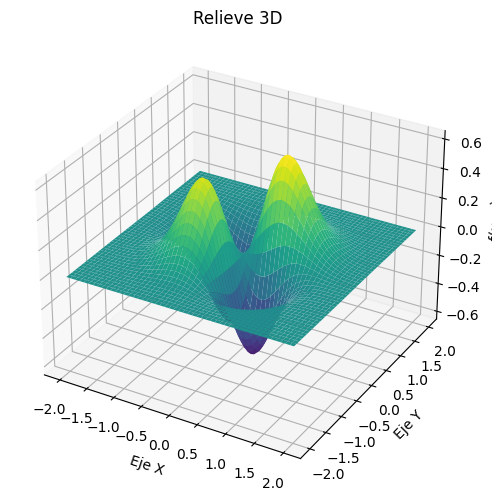

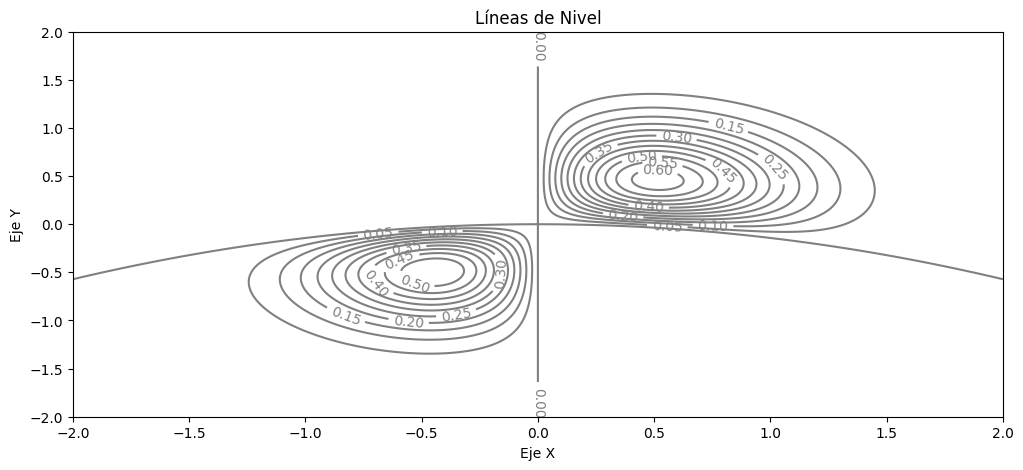

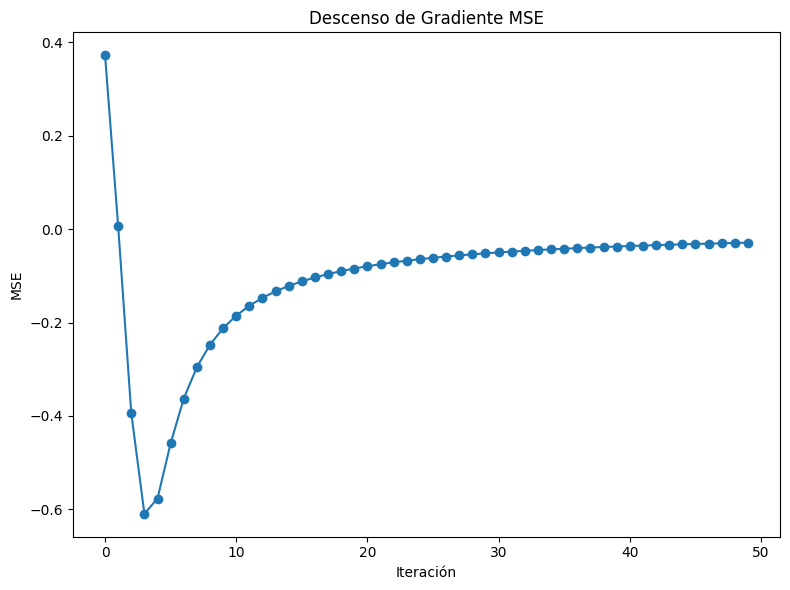

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función del relieve 3D
def f(x, y):
    return (7 * x * y + x**3) / 9**(x**2 + y**2)

# Gradiente de la función f(x, y)
def gradient(x, y):
    df_dx = (7 * y + 3 * x**2) / 9**(x**2 + y**2) * np.log(3)
    df_dy = (7 * x + 3 * y**2) / 9**(x**2 + y**2) * np.log(3)
    return df_dx, df_dy

# Descenso de gradiente
def gradient_descent(x0, y0, learning_rate, num_iterations):
    x_values = [x0]
    y_values = [y0]
    mse_values = []

    for _ in range(num_iterations):
        x, y = x_values[-1], y_values[-1]
        df_dx, df_dy = gradient(x, y)
        x_new = x - learning_rate * df_dx
        y_new = y - learning_rate * df_dy
        x_values.append(x_new)
        y_values.append(y_new)
        mse_values.append(f(x_new, y_new))

    return x_values, y_values, mse_values

# Punto inicial
x0, y0 = 0.36, 0.68

# Tasa de aprendizaje y número de iteraciones
learning_rate = 0.1
num_iterations = 50

# Realizar el descenso de gradiente
x_values, y_values, mse_values = gradient_descent(x0, y0, learning_rate, num_iterations)
print("********************************")
print("Valores costos MSE, por iteración:")
for index, miscostos in enumerate(mse_values):
    print(f'Íteración {index}: {miscostos}')
print("********************")
# Crear una malla de puntos para graficar el relieve
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Crear la figura en 3D del relieve
fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Relieve 3D')

# Crear la figura de líneas de nivel
plt.figure(figsize=(12, 5))
contour = plt.contour(X, Y, Z, colors='gray', levels=np.arange(0, 1, 0.05))
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Líneas de Nivel')

# Crear la gráfica de costos del descenso de gradiente
plt.figure(figsize=(8, 6))
plt.plot(range(len(mse_values)), mse_values, marker='o', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.title('Descenso de Gradiente MSE')

# Mostrar las gráficas
plt.tight_layout()
plt.show()
